## Load data and imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('..')
sys.path.append('d:\\Hacks\\re_new')

In [2]:
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')
train.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [3]:
train.shape, test.shape

((909604, 16), (303202, 15))

In [4]:
df = pd.concat([train, test],axis=0, ignore_index=True)
df

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212801,2021-06-15 20:14:00,1754.986613,1797.301392,39.138250,1201.708130,85.610317,1631.455973,38.890467,38.542006,341.591410,404.388580,322.968750,10.402939,1.133143,Turbine_10,NaN
1212802,2021-04-17 20:23:00,961.416738,970.462962,33.718848,1194.447693,72.564436,979.040192,33.418560,33.190632,158.035688,186.806035,309.976791,7.312443,0.829828,Turbine_97,NaN
1212803,2021-10-16 09:14:00,5.583539,18.309381,29.148418,771.026876,62.844919,114.049692,29.836640,31.198618,56.898274,62.813501,330.593165,3.404537,0.622060,Turbine_120,NaN
1212804,2021-12-11 18:55:00,34.711766,26.472111,31.942072,769.952612,63.219437,28.972680,30.332543,31.662434,15.277295,21.483844,133.001864,3.597401,0.252044,Turbine_01,NaN


In [12]:
def histplot(ft):
    plt.hist(df[ft], bins=100)
    plt.title(ft)
    plt.show()

def kde(ft):
    sns.kdeplot(df[ft], shade=True)
    plt.title(ft)
    plt.show()

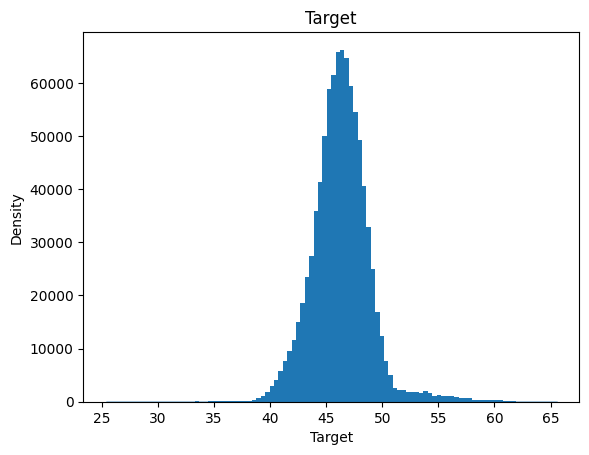

<AxesSubplot:xlabel='Target', ylabel='Density'>

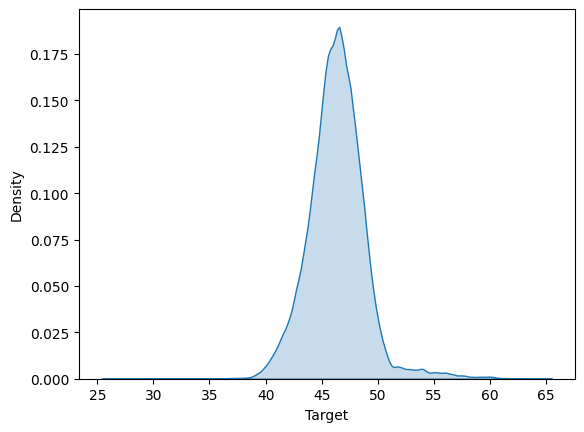

In [20]:
xgb_preds = pd.read_csv(r'..\submissions\baseline xgb_train_cv.csv')

<AxesSubplot:xlabel='Target', ylabel='Density'>

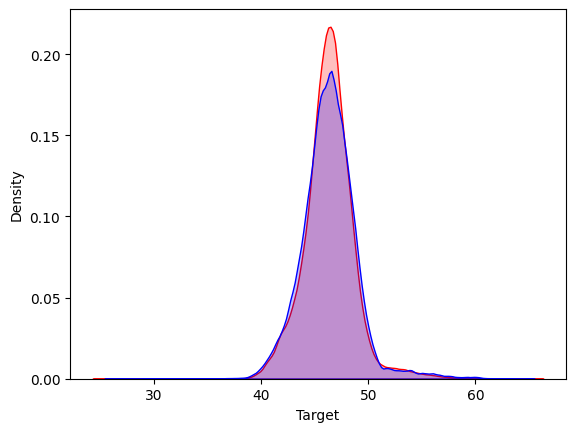

In [21]:
sns.kdeplot(xgb_preds['Target'], shade=True, color='r')
sns.kdeplot(train['Target'], shade=True, color='b')   # xgb_preds have more preds at mean than train

# ft plots

<AxesSubplot:xlabel='active_power_calculated_by_converter', ylabel='Density'>

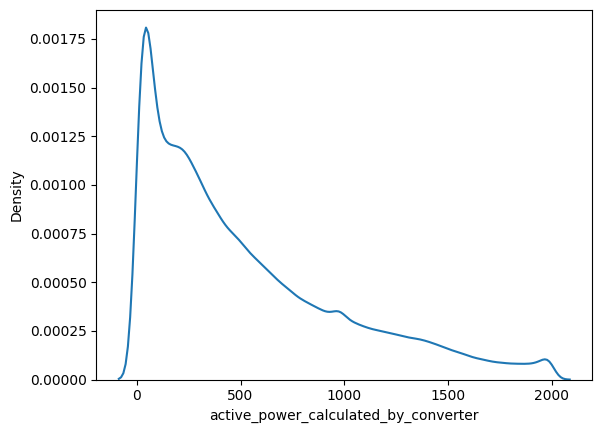

In [26]:
sns.kdeplot(df.iloc[:, 1])

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.iloc[:, 1:4])
x = scaler.transform(df.iloc[:, 1:4])

<AxesSubplot:ylabel='Density'>

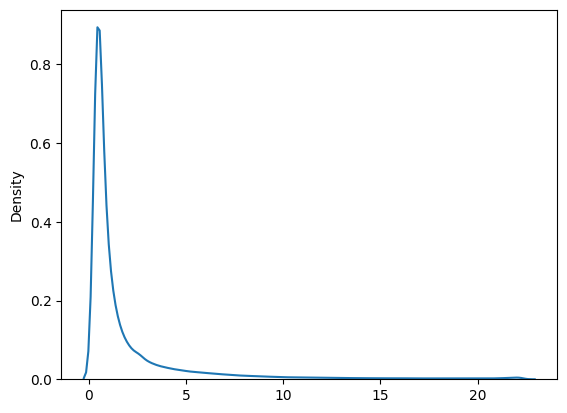

In [40]:
sns.kdeplot(np.exp(x[:, 0]))